# 教學目標:
了解 Padding 的作法 <br />
<br />
了解 Pooling 的作法 <br />

# 範例說明:
(1)zero_pad - feature map 跟原圖的比對 <br />
<br />
(2)pool_forward - 前行網路的 pooling layer<br />

In [8]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

%matplotlib inline

plt.rcParams['figure.figsize'] = (5.0, 4.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2
np.random.seed(2)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [0]:
def zero_pad(x, pad):
  
  '''
  
  do the zero-padding on image
  x : numpy array, dimension would be (m, n_H, n_W, n_C) 
  m is the number of image in a batch, n_H is the height of image, n_W is the width of image, n_C is the channel of image
  
  pad : integer, how many padding we will add
  
  x_pad - the result image after padding   
  '''
  
  x_pad = np.pad(x, ( (0,0), (pad,pad), (pad,pad), (0,0)), 'constant', constant_values = (0,0))
  return x_pad

 x shape : (4, 3, 3, 1)
 x_pad shape : (4, 7, 7, 1)
 x[1,1] : [[ 0.04153939]
 [-1.11792545]
 [ 0.53905832]]
 x_pad[1,1] : [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


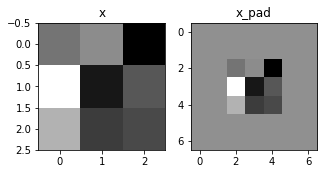

In [10]:
x = np.random.randn(4,3,3,1)
x_pad = zero_pad(x, 2)
print(f' x shape : {x.shape}')
print(f' x_pad shape : {x_pad.shape}')
print(f' x[1,1] : {x[1,1]}')
print(f' x_pad[1,1] : {x_pad[1,1]}')

plt.subplot(1,2,1)
plt.title('x')
plt.imshow(x[0,:,:,0])
plt.subplot(1,2,2)
plt.title('x_pad')
plt.imshow(x_pad[0,:,:,0])
plt.show()

In [0]:
def pool_forward(A_prev, hparameters, mode = 'max'):
  '''
  design a forward netwok maxpool layer
  
  A_prev : input numpy array, dimension : (m, n_H_prev, n_W_prev, n_C_prev)
  hparameters : dict of "f" and "stride" 
  mode : mode of maxpooling , "max" or "average"
  
  return:
  A : output of maxpooling
  cache : the data can be used on backward pass pooling layer which include input and hparameters
 
  '''
  
  (m,h,w,c) = A_prev.shape
  
  f = hparameters["f"]
  stride = hparameters["stride"]
  
  out_h = int( (h - f)/stride + 1 )
  out_w = int( (w - f)/stride + 1 )
  out_c = c
  
  A = np.zeros((m,out_h, out_w, c))
  
  
  for i in range(m):
    for j in range(out_h):
      for k in range(out_w):
        for l in range(out_c):
          
          vert_start = j * stride
          vert_end = vert_start + f
          horiz_start = k * stride
          horiz_end = horiz_start + f
          
          part_mat = A_prev[i,vert_start : vert_end, horiz_start : horiz_end, l]
          
          if mode == 'max':
              A[i,j,k,l] = np.max(part_mat)
          else:
              A[i,j,k,l] = np.mean(part_mat)

  cache = (A_prev, hparameters)
  assert(A.shape == (m,out_h,out_w,c))
  return A, cache
  

In [27]:
A_prev = np.random.randn(2,4,4,3)
hparameters = {"stride":2, "f":3}
A,cache = pool_forward(A_prev, hparameters)
print("mode = max")
print(f"A = {A}")
print()
A,cacje = pool_forward(A_prev, hparameters, mode = 'average')
print("mode = average")
print(f"A = {A}")

mode = max
A = [[[[1.0858064  1.90437591 0.54894656]]]


 [[[1.04547799 1.93315697 1.0281849 ]]]]

mode = average
A = [[[[-0.0834588   0.14211836 -0.46910401]]]


 [[[-0.4873067   0.86568792 -0.26576876]]]]


# 作業目標:
了解 Padding 的作法 <br />
<br />
了解 Pooling 的作法<br />

# 作業重點:
(1) 調整Padding 的設定, 看 Pad 後的結果<br />
<br />
(2) 調整Pooling 的設定, 看 Poolin 後的結果<br />

 image shape : (28, 28)


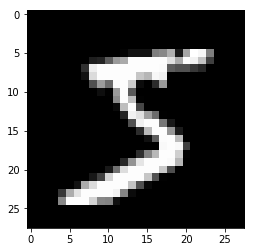

In [28]:
import keras

(train_x, train_y), (test_x, test_y) = keras.datasets.mnist.load_data()
image = train_x[0]
print(f' image shape : {image.shape}')
plt.imshow(image)
plt.show()

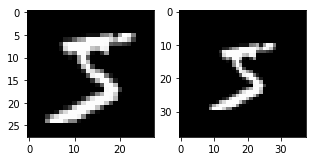

In [29]:
image = image.reshape(1,image.shape[0],image.shape[1],1)

pad_image = zero_pad(image, 5)

plt.subplot(1,2,1)
plt.imshow(image.reshape(image.shape[1],image.shape[2]))
plt.subplot(1,2,2)
plt.imshow(pad_image.reshape(pad_image.shape[1],pad_image.shape[2]))
plt.show()

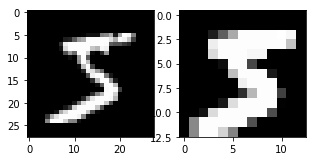

In [30]:

hparameters = {"stride":2 , "f" : 3}
maxpool_image, cache = pool_forward(image, hparameters)
plt.subplot(1,2,1)
plt.imshow(image.reshape(image.shape[1],image.shape[2]))
plt.subplot(1,2,2)
plt.imshow(maxpool_image.reshape(maxpool_image.shape[1],maxpool_image.shape[2]))
plt.show()

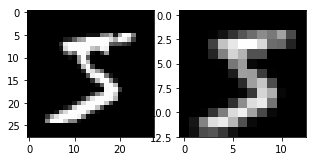

In [31]:

hparameters = {"stride":2 , "f" : 3}
maxpool_image, cache = pool_forward(image, hparameters, mode = 'average')
plt.subplot(1,2,1)
plt.imshow(image.reshape(image.shape[1],image.shape[2]))
plt.subplot(1,2,2)
plt.imshow(maxpool_image.reshape(maxpool_image.shape[1],maxpool_image.shape[2]))
plt.show()